In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [103]:
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
AllAthletesData=pd.merge(Kayaking,Triathlon,how='outer').merge(Fencing,how='outer')
AllAthletesData.head()
AllAthletesData.to_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData',index=False)

C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q33: Create a list and a tuple. Print the types and lengths of  both.

In [9]:

# Getting athletes personal data from the VO2Max_Combined as lists and tuples 
Athletes_list = Athletes['ID'].tolist()
Athletes_tuple = tuple(Athletes['First Name'] + " " + Athletes['Last Name'])

# Printing the list, types and lengths of both of the list and tuples
print("\nAthletes List:\t", Athletes_list)
print("\nType :\t", type(Athletes_list))
print("\nLength :\t", len(Athletes_list))

print("\nAthletes tuple:\t",Athletes_tuple)
print("\nType :\t", type(Athletes_tuple))
print("\nLength :\t", len(Athletes_tuple))


Athletes List:	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

Type :	 <class 'list'>

Length :	 18

Athletes tuple:	 ('Olivia Martinez', 'Ethan Reynolds', 'Jackson Harper', 'Liam Sanchez', 'Ava Thompson', 'Sophia Rodriguez', 'Grace Simmons', 'Aiden Bennett', 'Chloe Price', 'Lily Jordan', 'Isabella Griffin', 'Caleb Dixon', 'Mia Carpenter', 'Harper Mitchell', 'Mason Wallace', 'Logan Anderson', 'Lucas Foster', 'Owen Myers')

Type :	 <class 'tuple'>

Length :	 18


Q34: Display a word cloud using any values in the dataset

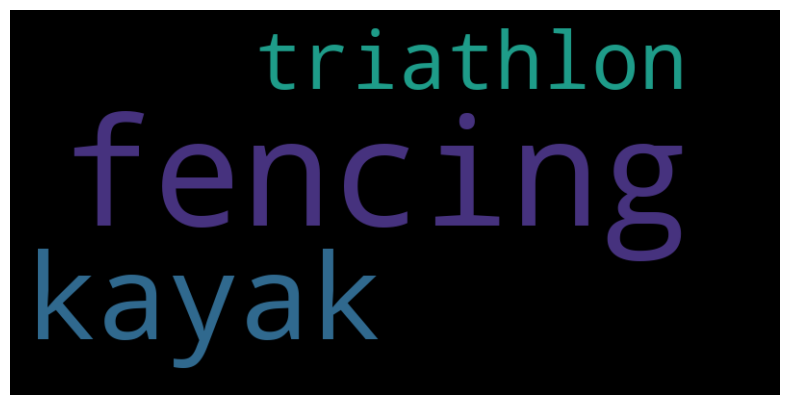

In [21]:
#!pip install wordcloud
data_Combined = ' '.join(Athletes['sport'])
word_Cloud = WordCloud(width=800, height=400, background_color='black').generate(data_Combined)
plt.figure(figsize=(10, 5))
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


Q35: Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

   ID        VO2  Weight        BMI
0   1  42.807730    53.7  20.716793
1   2  38.632602    56.2  21.414419
2   3  69.705657    89.9  24.642965
3   4  76.989878    76.5  23.611111
4   5  86.742579    76.4  22.083478
5   6  71.679465    65.6  22.968383
6   7  38.403988    49.8  18.292011
7   8  44.822092    51.2  18.806244
8   9  49.697342    57.1  18.433626
9  10  55.122171    58.8  18.768553


C:\Users\shoeg\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


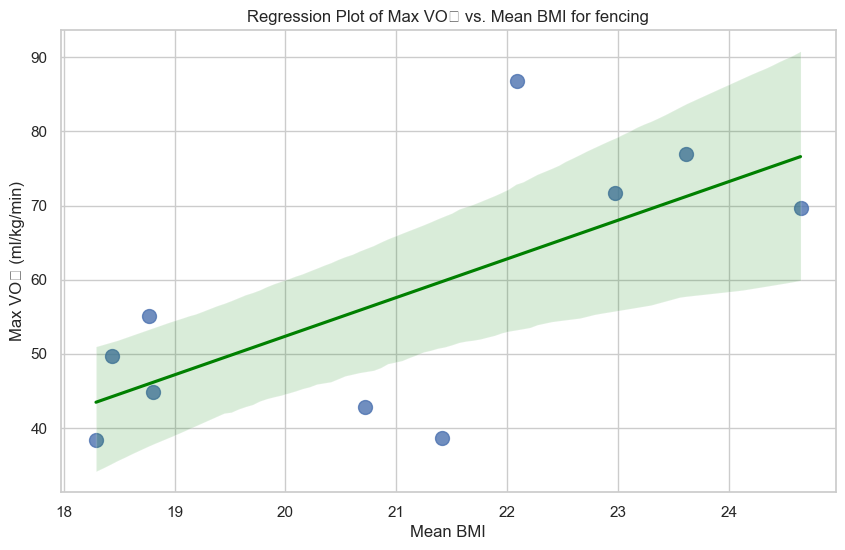

In [119]:

#reg plot, implot seaborn
# BMI is calculated with weight/heightinmeters**2
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']/100)**2
# fencing sport data is retrieved from dataset
fencing_Athletes = Athletes[Athletes['sport'] == 'fencing']
athlete_Data = fencing_Athletes[['ID','Weight', 'BMI']]

max_VO2_Data=AllAthletesData[['ID','VO2']].groupby(by='ID').sum().reset_index()
max_VO2_Data=max_VO2_Data.merge(athlete_Data,on='ID')
max_VO2_Data['VO2'] /= max_VO2_Data['Weight']

print(max_VO2_Data)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='VO2', data=max_VO2_Data, scatter_kws={'s':100}, line_kws={'color':'green'})

# Adding labels and title
plt.xlabel('Mean BMI')
plt.ylabel('Max VO₂ (ml/kg/min)')
plt.title('Regression Plot of Max VO₂ vs. Mean BMI for fencing')
plt.show()


Q36: Plot the time series of HR( every 5 mins) of athlete 1

In [ ]:
lineplot

Q37: What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [69]:
df_excersizetype=pd.read_excel('AllAthletesData.xlsx',sheet_name='AllAthletesData')
df_excersizetype.loc[df_excersizetype['time'] < 0,'ExType']='Warm Up' 
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] > 0), 'ExType'] = 'GET'
df_excersizetype.loc[(df_excersizetype['time'] >= 0) & (df_excersizetype['power'] == 0), 'ExType'] = 'Cool Down'
df_excersizetype
df_Power = pd.merge(AllAthletesData, Athletes, on='ID')
filter_df = df_Power[df_Power['power'] == (df_Power['power'].aggregate('max'))]
print(filter_df[['First Name','Last Name', 'sport','power']])


      First Name Last Name  sport  power
30918   Isabella   Griffin  kayak    335
30919   Isabella   Griffin  kayak    335
30920   Isabella   Griffin  kayak    335
30921   Isabella   Griffin  kayak    335
30922   Isabella   Griffin  kayak    335


Q38: What is the average  difference in IBI during the warm up Vs the actual test?

In [71]:

avg_IBI = df_excersizetype.groupby('ExType')['RR'].mean()
print(avg_IBI)
diff_IBI = avg_IBI['GET'] - avg_IBI['Warm Up']

print(f"The average IBI difference b/w warm up and actual test is : {diff_IBI:.2f} milliseconds")


ExType
Cool Down    430.566582
GET          410.184310
Warm Up      767.806178
Name: RR, dtype: float64
The average IBI difference b/w warm up and actual test is : -357.62 milliseconds


Q39: 
Print out what's in indexes 7, 10, and 3 for the array. [1, 2, 3, 4, 5,6,7,8,9,10]

In [61]:
int_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Array index starts from 0 and ends at 9.Trying to print unaccessable index will cause index error 
try:
    print(int_array[7]) 
    print(int_array[10]) 
    print(int_array[3])  
except IndexError as e:
    print(f"We cannot print this index because {e}")



8
We cannot print this index because list index out of range


Q40:   [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  Use array slicing to display elements 1,3,5. If the value is less than 4 display it as 99

In [587]:
import numpy as np

given_arr =np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15],[16, 17, 18, 19, 20],[21, 22, 23, 24, 25],[26, 27, 28, 29, 30]])
print("\nOriginal array:\n")
print(given_arr)   

sliced_arr = given_arr[0:1:,0:5:2]
print(f"\nSliced array:\t {sliced_arr}")

#If the value is less than 4 display it as 99
sliced_arr[sliced_arr < 4]=99
print(f"\nFinal output:\t {sliced_arr}")



Original array:

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

Sliced array:	 [[1 3 5]]

Final output:	 [[99 99  5]]


Q41: What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

Q42: What was the difference in heart rate between warm up and GET for athlete 1

In [695]:

df_excersizetype['HeartRate'] = 60 * 1000 / df_excersizetype['RR']

athlete_id = 1  
df_athlete = df_excersizetype[df_excersizetype['ID'] == athlete_id]

df_warmup = df_athlete[df_athlete['ExType'] == 'Warm Up']  
df_GET = df_athlete[df_athlete['ExType'] == 'GET'] 

avg_heart_rate_warmup = df_warmup['HeartRate'].mean()
avg_heart_rate_test = df_GET['HeartRate'].mean()

diff_heart_rate = avg_heart_rate_test - avg_heart_rate_warmup
print(f"The difference in heart rate b/w warm up and GET fot athlete 1 is  {diff_heart_rate:.2f}")

The difference in heart rate b/w warm up and GET fot athlete 1 is  82.49


Q43: Create a pivot table that shows count of patients within each age group and sport

In [217]:
#try violin bmi
bins = [0, 12, 14, 16, 18, 100] 
labels = ['0-12', '13-14', '15-16', '17-18', '19+'] 

Athletes['age_range'] = pd.cut(Athletes['age'], bins=bins, labels=labels, right=True)
piv_data = pd.pivot_table(Athletes, index='age_range', columns='sport',values='ID',aggfunc='count',observed=False)

print("Number of athletes in each age group and sport:")
print(piv_data)

Number of athletes in each age group and sport:
sport      fencing  kayak  triathlon
age_range                           
0-12             0      0          2
13-14            2      2          0
15-16            6      1          0
17-18            2      3          0
19+              0      0          0


Q44: Display a  distrubution chart of MAX V02 for all athletes

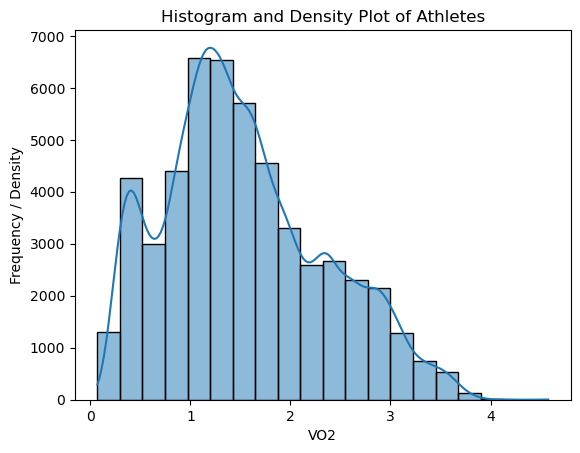

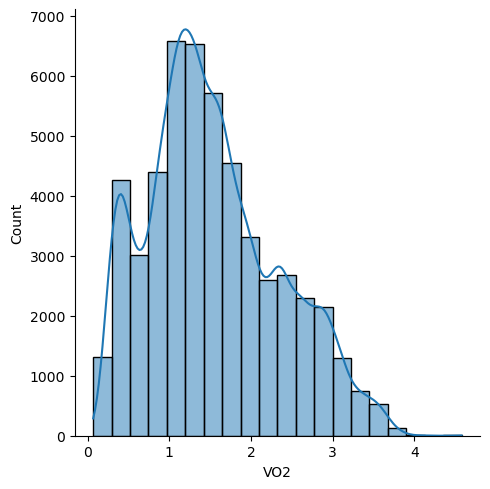

In [398]:
sns.histplot(AllAthletesData['VO2'], kde=True, bins=20)
plt.xlabel('VO2')
plt.ylabel('Frequency / Density')
plt.title('Histogram and Density Plot of Athletes')
plt.show()

sns.displot(AllAthletesData['VO2'],kde=True,bins=20,element='bars')
plt.show()

Q45: Create a dummy array with no data with a size of 15.

In [723]:
# Type1
# create empty object array and print
empty_obj_array1 = np.empty(15, dtype=object)
empty_obj_array2 = np.empty(15)
print(f"\nDummy Array with object type :\t {empty_obj_array1}")
print(f"\nDummy Array with any type :\t {empty_obj_array2}")

# Type2 2D Array
# create empty array 
empty_array = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]])
# checking if its empty
print(f"\nDummy 2D Array with empty subsets :\t {empty_array}")
#print(np.any(empty_array))
print(f"\nLength of array :\t{len(empty_array)}")



Dummy Array with object type :	 [None None None None None None None None None None None None None None
 None]

Dummy Array with any type :	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Dummy 2D Array with empty subsets :	 []

Length of array :	15


Q46: How many minutes did participant 15s exercise last and what was the total V02 max consumed during the test?

Q47: Convert ' sport' into a numeric field through Label encoding

In [729]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Athletes = pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
print("\nBefore encoding :")
#print(Athletes[['ID','First Name','Last Name','sport']])
print(Athletes['sport'].unique())
Athletes['sport_encoded'] = LabelEncoder().fit_transform(Athletes['sport'])
print("\nAfter encoding :")
print(Athletes['sport_encoded'].unique())
print(Athletes[['ID','First Name','Last Name','sport','sport_encoded']])



Before encoding :
['fencing' 'kayak' 'triathlon']

After encoding :
[0 1 2]
    ID First Name  Last Name      sport  sport_encoded
0    1     Olivia   Martinez    fencing              0
1    2      Ethan   Reynolds    fencing              0
2    3    Jackson     Harper    fencing              0
3    4       Liam    Sanchez    fencing              0
4    5        Ava   Thompson    fencing              0
5    6     Sophia  Rodriguez    fencing              0
6    7      Grace    Simmons    fencing              0
7    8      Aiden    Bennett    fencing              0
8    9      Chloe      Price    fencing              0
9   10       Lily     Jordan    fencing              0
10  11   Isabella    Griffin      kayak              1
11  12      Caleb      Dixon      kayak              1
12  13        Mia  Carpenter      kayak              1
13  14     Harper   Mitchell      kayak              1
14  15      Mason    Wallace      kayak              1
15  16      Logan   Anderson      kayak    

C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Q48: What was the average age of the athletes?


In [86]:
Athletes = pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
average_Age =Athletes['age'].mean()
#print(round(average_Age,2))
print(f"Average age of the Athletes: {average_Age:.2f}")

15.22
Average age of the Athletes: 15.22


C:\Users\shoeg\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
